In [3]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to load
Test_Data = "../data/NFL-PlaybyPlay-2009-2018.csv"

#Read the file 
nfl_data = pd.read_csv(Test_Data)
nfl_data.head()


/Users/i817245/anaconda3/envs/Project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [4]:
# Just grab total number of plays
total_plays = nfl_data["play_id"].count()
total_plays

449371

In [5]:
# Create a column for year that game occurred

game_year = pd.DatetimeIndex(nfl_data["game_date"]).year
nfl_data["game_year"] = game_year
nfl_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,game_year
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0,2009
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0,2009
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0,2009
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0,2009
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0,2009


In [6]:
# Code to discover the average yardage of all run plays vs. all pass plays

run_play = nfl_data.loc[nfl_data["play_type"] == "run", :]
run_avg = run_play["yards_gained"].mean()

pass_play = nfl_data.loc[nfl_data["play_type"] == "pass", :]
pass_avg = pass_play["yards_gained"].mean()

print(f'Pass average:', pass_avg, 'Run average:', run_avg)


Pass average: 6.320308940736334 Run average: 4.360905374624772


Text(0, 0.5, 'Avg Yards Gained')

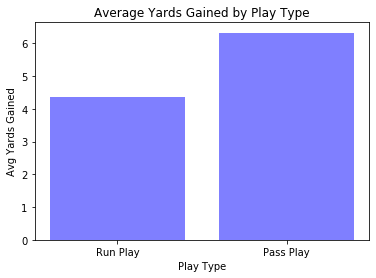

In [7]:
#Create a chart detailing the average yards gained by play type for overall sample size

avg_yards = [run_avg, pass_avg]
x_axis = np.arange(len(avg_yards))

plt.bar(x_axis, avg_yards, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Run Play", "Pass Play"])

plt.title("Average Yards Gained by Play Type")
plt.xlabel("Play Type")
plt.ylabel("Avg Yards Gained")

In [9]:
#Calculate the turnovers by play type

fumbles = run_play["fumble_lost"].sum()

interceptions = pass_play["interception"].sum()

print(f'Run play fumbles total:', fumbles, 'Pass play interceptions:', interceptions)


Run play fumbles total: 1054.0 Pass play interceptions: 4351.0


In [10]:
# % of run plays resulting in fumble and % of pass plays resulting in int

fumble_pct = fumbles / run_play["play_id"].count()
print(f'% of Run plays resulting in fumble: {fumble_pct}')

% of Run plays resulting in fumble: 0.00794320682482742


In [11]:
# % of pass plays resulting in int

int_pct = interceptions / pass_play["play_id"].count()
print(f'% of Pass plays resulting in interception: {int_pct}')

% of Pass plays resulting in interception: 0.02330763832716403


Text(0, 0.5, 'Total Count of Turnover Type')

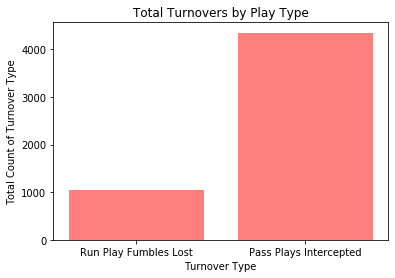

In [11]:
# Construct simple chart for turnovers

Turnovers = [fumbles, interceptions]
x_axis = np.arange(len(Turnovers))

plt.bar(x_axis, Turnovers, color='r', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Run Play Fumbles Lost", "Pass Plays Intercepted"])

plt.title("Total Turnovers by Play Type")
plt.xlabel("Turnover Type")
plt.ylabel("Total Count of Turnover Type")

In [12]:
# Sack vs Tackle for Loss Analysis (play count)

sacks = pass_play["sack"].sum()
tackled_for_loss = run_play["tackled_for_loss"].sum()

print(f'Tackled for Loss - Run:', tackled_for_loss, '; Sacks Taken - Pass', sacks)

Tackled for Loss - Run: 12979.0 ; Sacks Taken - Pass 11785.0


In [13]:
# Sack vs Tackle for Loss Analysis (yardage)

sack_plays = pass_play.loc[pass_play["sack"] == 1, :]
avg_loss_sack = sack_plays["yards_gained"].mean()


tfl_plays = run_play.loc[run_play["tackled_for_loss"] == 1, :]
avg_loss_tfl = tfl_plays["yards_gained"].mean()

print(f'Avg loss when TFL - Run:', avg_loss_tfl, '; Avg loss when sacked - Pass', avg_loss_sack)


Avg loss when TFL - Run: -2.2762954966070326 ; Avg loss when sacked - Pass -6.538004246284501


In [14]:
# Safety Analysis 

safety_run = run_play.loc[run_play["safety"] == 1, :]
safety_pass = pass_play.loc[pass_play["safety"] == 1, :]

safety_count_run = safety_run["play_id"].count()
safety_count_pass = safety_pass["play_id"].count()

print(f'Safeties via Run:', safety_count_run, '; Safeties via Pass', safety_count_pass)

Safeties via Run: 58 ; Safeties via Pass 61


In [15]:
# Annual Average Yards gained by run play
annual_run_yd = run_play.groupby("game_year")["yards_gained"].mean()
annual_run_yd

game_year
2009    4.359070
2010    4.369907
2011    4.393241
2012    4.420730
2013    4.322209
2014    4.298687
2015    4.294626
2016    4.345939
2017    4.226448
2018    4.599251
Name: yards_gained, dtype: float64

In [16]:
# Annual Average Yards gained by pass play
annual_pass_yd = pass_play.groupby("game_year")["yards_gained"].mean()
annual_pass_yd

game_year
2009    6.235110
2010    6.232856
2011    6.328927
2012    6.296332
2013    6.227259
2014    6.385965
2015    6.436385
2016    6.403542
2017    6.183084
2018    6.484034
Name: yards_gained, dtype: float64